# Linear Regression using Normal Equation (Linear algebra (matrices))

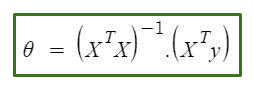

## Problem Statement: To predict the SAT score based on the other subjects marks like General Knowledge, Aptitude, Maths, Science.

### Importing the required packages

In [26]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mino
import pandas_profiling as pp

import warnings
warnings.simplefilter("ignore")
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,mean_absolute_error

from datetime import datetime
import logging
import pickle
import os
%matplotlib inline
os.chdir(os.getcwd())
logging.basicConfig(filename='SAT.log',level = logging.INFO,force = True)
logging.info("SAT Exam Score Prediction")

### Class EDA

In [27]:
class EDA():
    
    def __init__(self):
        pass
    
     ## 1. Load the data set
    def loaddata(self,filename):
        
        """ Load the data """
        try:
            df = pd.read_csv(filename)
            logging.info("Dataset loaded!")
            return df
        except Exception as e:
            logging.exception(str(e)) 
            
            
    #  panda profiling
    def profiling(self,df):
        
        """ Performs EDA on dataset and saves the profiling file. """
        try:
            pf = pp.ProfileReport(df)
            pd_f = pf.to_widgets()
            pf.to_file("SAT_Profiling.html")
            logging.info("Profiling completed")
            return df
        except Exception as e:
            logging.exception(str(e))
            
    def eda(self,filename):
        
        """ performs initial EDA"""
        df = self.loaddata(filename)
        df = self.profiling(df)
        return df
    

### Class Datapreprocessing

In [28]:
class Datapreprocessing():
    
    def __init__(self):
        pass
    
    def clean_column_names(self,df):
        """ Removes special charectors and space
        form columns names"""
        try:
            columns = df.columns
            colupdated = []
            for col in columns:
                removespecialchars = col.translate({ord(c): "" for c in "!@#$%^&*()[]{};:,. /<>?\|`~-=_+'"})
                colupdated.append(removespecialchars)
            df.columns = colupdated
            logging.info("Column header updated")
            return df
        except Exception as e:
            logging.exception(str(e))  
    

    def remove_outlier_IQR(self,df, q1=0.25, q3=0.75):
        """ Removes outliers with Q1 = 0.25, Q3 = 0.75"""

        try:        
            Q1 = df.quantile(q1)
            Q3 = df.quantile(q3)
            IQR = Q3 - Q1
            df_final = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]
            logging.info("Outliers removed")
            return df_final
        except Exception as e:
            logging.exception(str(e))
    
    def drop_duplicate(self,df, keep = 'first'):
        """ Drops duplicate rows
        keep = first - keeping the first occurrence
        keep = 'fast - keeping last occurrence
        keep = False - keeps nothing. """
        try:
            df = df.drop_duplicates(subset=None, keep= keep, inplace=False)
            return df
        except Exception as e:
            logging.exception(str(e))

    def drop_missing_value(self,df, axis=0):
        """Drops missing values rows or columns
         df - DataFrame
         axis = 1 - columns
         axis = 0 - rows """

        try:
            reduced_df = df.dropna(axis=axis)
            logging.info("Missing values dropped")
            return reduced_df
        except Exception as e:
            logging.exception(str(e))


    def impute_missing_value(self,df):
        """make new columns indicating what will be imputed"""

        try:
            cols_with_missing = (col for col in df.columns
                                 if df[col].isna().any())
            for col in cols_with_missing:
                df[col + '_was_missing'] = df[col].isnull()
            columns = df.columns
            # Imputation
            my_imputer = SimpleImputer()
            df = pd.DataFrame(my_imputer.fit_transform(df), columns=columns)
            logging.info("Missing values imputed")
            return df
        except Exception as e:
            logging.exception(str(e))


    def dataprocess(self,df):
        """ Performs, cleaning columns headers, removing outliers, imputing missed values"""
        df = self.clean_column_names(df)
        print("Columns headers cleaned") 
        df = self.remove_outlier_IQR(df)
        print("Outliers removed")
        df = self.drop_missing_value(df)
        print("missing values imputed")
        return df

    

    

### Class VisualizeData

In [29]:
class VisualizeData():
    
    def __init__(self):
        pass
    
    def bivariateanalysis(df):
        pass
        
        pass
    def multivariateanalysis(self,df):
        """ Displays multivariate analysis"""
        sns.pairplot(df,height=2,diag_kind='kde')
        return df
        

### Class TrainSATModel

In [30]:
class TrainSATModel():
    theta_ = []
    X_train_= []
    X_test_ = []
    y_train_ =[]
    y_test_ = []
    y_pred_ = []
    
    
    
    def __init__(self):
        pass
    
    def splitthedata(self,X,y):
        """ split the data into training and test"""
        try:

            ## Splitting data
            logging.info("Data Splitting completed")
            return train_test_split(X,y,test_size=0.2,random_state=42)   
        except Exception as e:
            logging.exception(str(e)) 

        
    def trainmodel(self,df):
        """ This function train the model using liner algebra (matrices method)
        normal equation => b = (X^T . X)^-1 . X^T . y 
        yhat = X.dot(b) 
        Steps :
        1. Add a new column the beginning with all 1’s for the intercept in the X matrix
        2. Take the transpose of X matrix
        3. Multiply X transpose and X matrices
        4. Find the inverse of this matrix
        5. Multiply X transpose with y matrix
        6. Multiply both the matrices to find the intercept and the coefficient
        """         
        
        try:
            #Separate input variables to matrix convert into np array

            X1 = df['Generalknowledge'].values
            X2 = df['Aptitude'].values
            X3 = df['Mathematics'].values
            X4 = df['Science'].values
            y = df['SAT'].values   



            # 1. Add a new column the beginning with all 1’s for the intercept in the X matrix
            X0 = np.ones(len(X1))
            X = np.array([X0,X1,X2,X3,X4]).T

            self.X_train_, self.X_test_,self.y_train_,self.y_test_ = self.splitthedata(X,y)


            #2. 2. Take the transpose of X matrix  --> X^T

            X_transpose = np.transpose(self.X_train_)

            #3. Multiply X transpose and X matrices  --- (X^T . X)

            X_trans_dot_X = X_transpose.dot(self.X_train_)

            # 4. Find the inverse of this matrix - (X^T . X)^-1

            X_trans_dot_X_inverse = np.linalg.inv(X_trans_dot_X)

            #5 Multiply X transpose with y matrix  - > X^T . y        

            self.theta_ = X_trans_dot_X_inverse.dot(self.X_train_.T).dot(self.y_train_)


            new_df = pd.DataFrame({"B0" : self.theta_[0], "B1" : self.theta_[1],"B2" : self.theta_[2],"B3": self.theta_[3],"B4" : self.theta_[4]},index=[0])
            new_df.to_csv("SAT_BetaValues.csv")
            logging.info("Model training Completed")
            logging.info("Theta Values")
            logging.ingo(self.theta_)
                         
            return self.theta_
        except Exception as e:
            logging.exception(str(e))

    def predictTest(self):       
        """ Predicted the values for teh test data"""
        try:
            
            self.y_pred_ = self.X_test_.dot(self.theta_)        
            pred_df = pd.DataFrame({"Actual" : self.y_test_, "Predicted" : self.y_pred_})  
            logging.info("Prediction with test data")
            logging.info("****************Predicted values**************")
            logging.info(pred_df)
            return pred_df
        except Exception as e:
            logging.exception(str(e))
    
    def metrics(self):
        """ Model metrics"""
        try:
            
            print('Mean Absolute Error:', mean_absolute_error(self.y_test_, self.y_pred_)) 
            print('Mean Squared Error:', mean_squared_error(self.y_test_, self.y_pred_))  
            print('Root Mean Squared Error:', np.sqrt(mean_squared_error(self.y_test_, self.y_pred_)))
            logging.info("***********Metrics***************")   
            
        except Exception as e:
            logging.exception(str(e))    

    def score(self):
        """ Accuracy if the model"""
        try:
            score = r2_score(self.y_test_,self.y_pred_)
            
            logging.info("Accuracy")
            logging.info(score)
            return score      
        except Exception as e:
            logging.exception(str(e))
        

### EDA

In [31]:
df_eda = EDA().eda("SAT_Exam.csv")

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Pre processing

In [32]:
df_datapro = Datapreprocessing().dataprocess(df_eda)

Columns headers cleaned
Outliers removed
missing values imputed


### Data Visualization

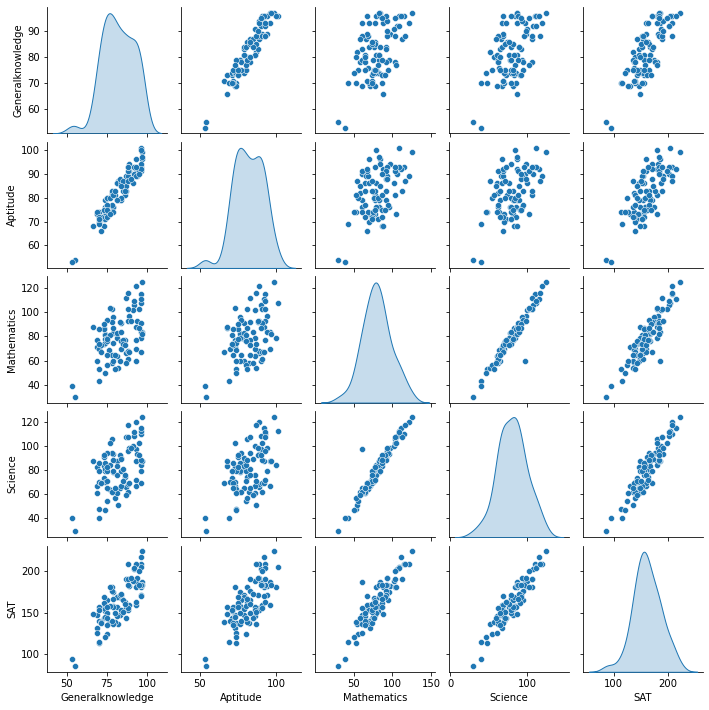

In [33]:
df_viz = VisualizeData().multivariateanalysis(df_datapro)

### Model training

In [34]:
model = TrainSATModel()

In [35]:
model.trainmodel(df_datapro)

In [36]:
model.theta_

array([-3.51179036,  1.31588808, -0.27456749,  0.01999536,  0.97298178])

### Model Prediction

        - X_test.dot(theta) 

In [37]:
df = model.predictTest()
df

,Actual,Predicted
0,146.0,140.093932
1,148.0,151.075241
2,147.0,148.459626
3,140.0,138.889051
4,115.0,109.434290
5,144.0,145.561075
6,183.0,182.017404
7,136.0,131.205481
8,159.0,159.096777
9,158.0,158.312851


### Model Score

In [38]:
model.score()

0.973716698179376

### Model Metrics

In [39]:
model.metrics()

Mean Absolute Error: 2.7201673657812973
Mean Squared Error: 11.83081179265933
Root Mean Squared Error: 3.439594713430542


In [40]:
model.X_test_

array([[  1.,  81.,  86.,  64.,  61.],
       [  1.,  66.,  68.,  88.,  87.],
       [  1.,  83.,  79.,  60.,  65.],
       [  1.,  70.,  70.,  70.,  70.],
       [  1.,  70.,  69.,  43.,  40.],
       [  1.,  73.,  71.,  74.,  73.],
       [  1.,  88.,  93.,  93.,  96.],
       [  1.,  82.,  87.,  54.,  51.],
       [  1.,  93.,  96.,  70.,  67.],
       [  1.,  74.,  76.,  82.,  86.],
       [  1.,  73.,  68.,  87.,  83.],
       [  1.,  97.,  96.,  84.,  87.],
       [  1.,  89.,  91.,  67.,  69.],
       [  1.,  75.,  75.,  78.,  82.],
       [  1.,  95.,  90.,  87.,  92.],
       [  1.,  93.,  89., 122., 120.],
       [  1.,  73.,  75.,  90.,  92.],
       [  1.,  87.,  85.,  58.,  59.]])

In [41]:
model.y_test_

array([146., 148., 147., 140., 115., 144., 183., 136., 159., 158., 157.,
       186., 159., 156., 183., 208., 169., 143.])

In [45]:
logging.shutdown()

### New Predictions

In [42]:
def predictnew(gk,apt,maths,sci):
    df = pd.read_csv("SAT_BetaValues.csv")
    y = df['B0'].values + df['B1'].values * gk + df['B2'].values * apt + df['B3'].values * maths + df['B4'].values * sci
    return y[0]

### Run this cell for new predictions

In [44]:
gk = float(input("Enter General Knowledge marks : "))
apt = float(input("Enter Aptitude marks : "))
maths = float(input("Enter Maths marks : "))
sci = float(input("Enter Science marks : "))

print("\n\nPredicted SAT Score is :", predictnew(gk,apt,maths,sci))

Enter General Knowledge marks : 78
Enter Aptitude marks : 89
Enter Maths marks : 67
Enter Science marks : 55


 Predicted SAT Score is : 129.5446608335995
